In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.isna().sum()

cgpa       0
package    0
dtype: int64

In [4]:
df.dtypes

cgpa       float64
package    float64
dtype: object

In [5]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    ls = df.index[(df[ft] > ub) | (df[ft] < lb)]
    return ls

def replace_outliers_with_mean(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    outliers_indices = df.index[(df[ft] >= ub) | (df[ft] <= lb)]


    df.loc[outliers_indices, ft] = df[ft].mean()

    return df

index_ls = []

for i in df.columns:
    index_ls.extend(outliers(df, i))
print(index_ls)

for i in df.columns:
    df = replace_outliers_with_mean(df, i)

[]


In [6]:
# #standard scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(df)

In [7]:
#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
#r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7730984312051673


<Axes: >

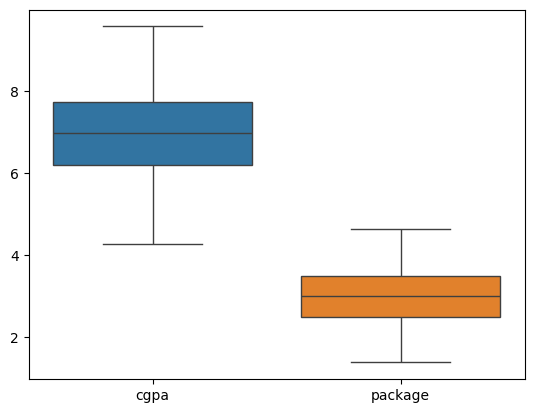

In [11]:
#boxplot
sns.boxplot(data=df)

<Axes: ylabel='Count'>

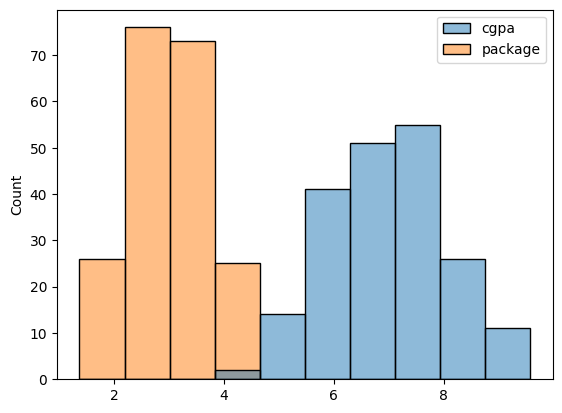

In [12]:
#distplot
sns.histplot(df)

<Axes: ylabel='Density'>

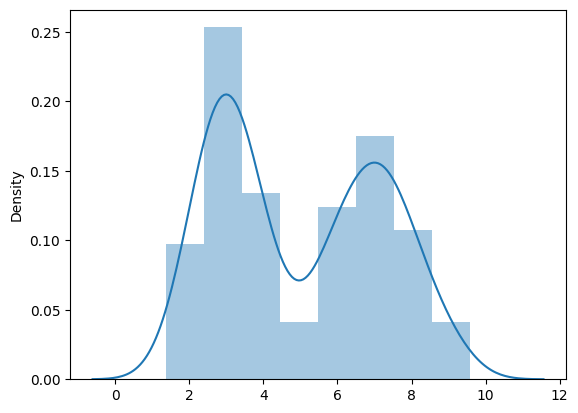

In [13]:
sns.distplot(df)

In [14]:
#yeo-johnson transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
new_df = pd.DataFrame(pt.fit_transform(df))

<Axes: >

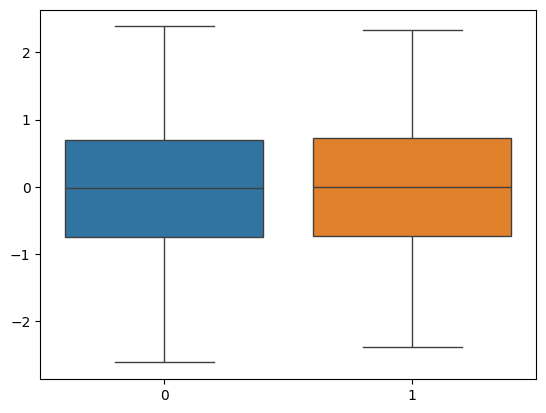

In [15]:
#boxplot
sns.boxplot(data=new_df)

In [16]:
W = new_df.iloc[:, :-1]
z = new_df.iloc[:, -1]

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.2, random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(W_train, z_train)

z_pred = regressor.predict(W_test)

#r2 score
r2 = r2_score(z_test, z_pred)
print(r2)

0.7307234904168096


In [18]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(W_train, z_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [19]:
z_pred = regressor.predict(W_test)

#r2 score
r2 = r2_score(z_test, z_pred)
print(r2)

0.4254801167712502


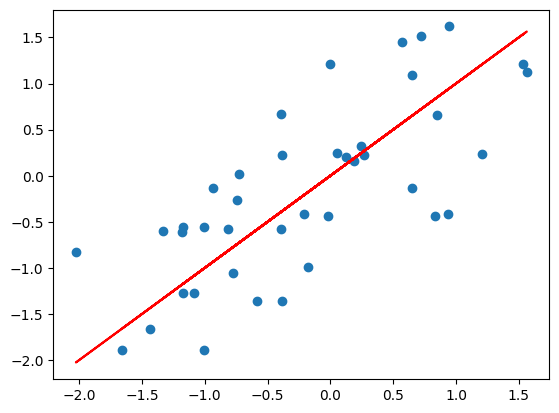

In [20]:
#scatter plot with slope
plt.scatter(z_test, z_pred)
plt.plot(z_test, z_test, color='red')

Coefficient of determination: 0.77


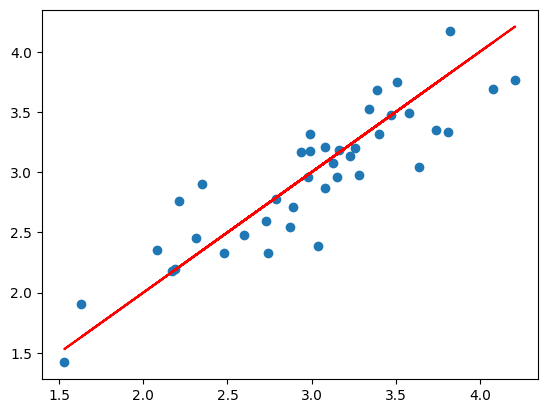

In [21]:
#scatter plot with slope
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))